## 讀檔案

In [1]:
import re

In [2]:
with open('penalty_cases.txt', 'r',encoding='utf-8') as f:
    txt = f.readlines()

In [3]:
len(txt)

374

## 簡單清理資料

In [4]:
def clean_str(string):
    string = re.sub(r"!", "", string)
    string = re.sub(r"\?", "", string)
    string = re.sub(r"\s{2,}", "", string)
    string = re.sub("\u3000", "", string)
    string = re.sub(r"\n", "", string)
    return string.strip().lower()

data = [clean_str(t) for t in txt]

## 檢查【】的字(全形)

In [5]:
str_rg = r'【[^【】]+】'

sys_t = []
for d in data:
    it = re.finditer(str_rg,d)
    for match in it:
        rg = match.span()
        sys_t.append(d[rg[0]:rg[1]])

In [6]:
sys_t

['【應受送達人：代表人鄧<u+3007><u+3007>先生】',
 '【應受送達人：代表人鄧<u+3007><u+3007>先生】',
 '【應受送達人：代表人鄧<u+3007><u+3007>先生】',
 '【應受送達人：代表人鄧<u+3007><u+3007>先生】',
 '【應受送達人：代表人鄧<u+3007><u+3007>先生】',
 '【應受送達人：代表人賴○○先生】',
 '【應受送達人：代表人賴○○先生】',
 '【應受送達人胡○○先生】',
 '【應受送達人：代表人鄭○○先生】',
 '【代表人許○○先生】',
 '【代表人陳○○先生】',
 '【代表人賀○○先生】',
 '【應受送達人代表人鄭○○先生】',
 '【代表人許○○先生】',
 '【代表人陳○○先生】',
 '【代表人賀○○先生】',
 '【應受送達人代表人鄭○○先生】',
 '【代表人許○○先生】',
 '【代表人陳○○先生】',
 '【代表人賀○○先生】',
 '【應受送達人代表人鄭○○先生】',
 '【代表人許○○先生】',
 '【代表人陳○○先生】',
 '【代表人賀○○先生】',
 '【應受送達人代表人鄭○○先生】',
 '【代表人許○○先生】',
 '【代表人陳○○先生】',
 '【代表人賀○○先生】',
 '【應受送達人：代表人賴○○先生】',
 '【請以雙掛號寄送】',
 '【應受送達人：代表人張○○先生】',
 '【代表人：許○○先生】',
 '【代表人：陳○○先生】',
 '【代表人：賀○○先生】',
 '【應受送達人：代表人張○○先生】',
 '【代表人：許○○先生】',
 '【代表人：陳○○先生】',
 '【代表人：賀○○先生】',
 '【應受送達人：代表人張○○先生】',
 '【代表人：許○○先生】',
 '【代表人：陳○○先生】',
 '【代表人：賀○○先生】',
 '【應受送達人：代表人張○○先生】',
 '【代表人：許○○先生】',
 '【代表人：陳○○先生】',
 '【代表人：賀○○先生】',
 '【應受送達人：代表人張○○先生】',
 '【代表人：許○○先生】',
 '【代表人：陳○○先生】',
 '【代表人：賀○○先生】',
 '【應受送達人：代表人張○○先生】',
 '【代表人：許○○先生】',
 '【代表人：陳○○先生】',
 '【代表人：

In [7]:
def del_useless_word(cnt,table):
    for t in table:
        cnt = cnt.replace(t,"")
    return cnt

In [8]:
for idx,_ in enumerate(data):
    data[idx] = del_useless_word(data[idx],set(sys_t))

## 檢查<>的字 (半形)

In [9]:
str_rg = r'<[^<>]+>'

sys_t = []
for d in data:
    it = re.finditer(str_rg,d)
    for match in it:
        rg = match.span()
        sys_t.append(d[rg[0]:rg[1]])

In [10]:
set(sys_t)

{'<u+0099>',
 '<u+2460>',
 '<u+2461>',
 '<u+2462>',
 '<u+3007>',
 '<u+30fd>',
 '<u+31d0>',
 '<u+522b>',
 '<u+5897>',
 '<u+596c>',
 '<u+5cef>',
 '<u+5efb>',
 '<u+654d>',
 '<u+67fb>',
 '<u+6ed9>',
 '<u+7d76>',
 '<u+8e28>',
 '<u+ff62>',
 '<u+ff63>',
 '<○>',
 '<台北市內湖區內湖路一段300號10樓之2>',
 '<略 >',
 '<略>',
 '<臺北市中山區江寧里民權東路3段6號7樓>',
 '<臺北市大安區敦化南路2段69號15樓>'}

In [11]:
for idx,_ in enumerate(data):
    data[idx] = del_useless_word(data[idx],set(sys_t))

## 檢查（）的字 (全形)

In [12]:
str_rg = r'（[^（）]+）'

sys_t = []
for d in data:
    it = re.finditer(str_rg,d)
    for match in it:
        rg = match.span()
        sys_t.append(d[rg[0]:rg[1]])

In [13]:
set(sys_t)

{'（****）',
 '（***）',
 '（02）',
 '（100年11月評等由aa3降為ba1）',
 '（104年7月15日活動，○○人壽保險事業股份有限公司遲至104年9月23日始函復同意；106年10月28日及108年3月27日活動，○○產物保險股份有限公司分別遲至106年11月27日及109年7月7日始函復同意）',
 '（106年3月至107年4月）',
 '（107年4月30日前）',
 '（109.3.19）',
 '（11.57億元）',
 '（19.32億元）',
 '（1、2樓商場，3、4樓辦公室，5~12樓旅館）',
 '（1）',
 '（200%）',
 '（2103）',
 '（2）',
 '（3324）',
 '（3）',
 '（4147）',
 '（4）',
 '（5日內）',
 '（5）',
 '（8467）',
 '（95%）',
 '（99年5月3日）',
 '（99年9月30日會計師核閱之股東權益負10,586,993千元加計各項準備58,150,453千元）',
 '（99年度）',
 '（aia）',
 '（aiit）',
 '（aml）',
 '（any或all）',
 '（atm）',
 '（aviva）',
 '（axa）',
 '（a區）',
 '（buffer overflow）',
 '（cesidp）',
 '（co-location;下稱co-lo）',
 '（co-location；下稱co-lo）',
 '（co–location）',
 '（cp）',
 '（defect no）',
 '（ecompass）',
 '（etf）',
 '（exchange trade note，etn）',
 '（f-isac）',
 '（force point ***）',
 '（gc公司及永豐金香港財務公司）',
 '（http://nanshanedm.com.tw/nanshana/mailhunter canceledm .aspx）',
 '（kyc）',
 '（log）',
 '（multi-failed login detail）',
 '（open system）',
 '（otp）',
 '（portia）',
 '（primary layer）',
 '（proposed testing 

In [14]:
for idx,_ in enumerate(data):
    data[idx] = del_useless_word(data[idx],set(sys_t))

## 檢查()的字 (半形)

In [15]:
str_rg = r'\([^\(\)]+\)'

sys_t = []
for d in data:
    it = re.finditer(str_rg,d)
    for match in it:
        rg = match.span()
        sys_t.append(d[rg[0]:rg[1]])

In [16]:
set(sys_t)

{'( hq0lux041)',
 '( trf等)',
 '(0*****)',
 '(00679b)',
 '(00723b)',
 '(00756b)',
 '(00758b)',
 '(00769b)',
 '(01007t)',
 '(010151****、107.4.18)',
 '(010163****、107.8.31)',
 '(010172****、108.3.29)',
 '(010173****、108.5.30)',
 '(02)',
 '(0976-ｏｏｏｏｏｏ)',
 '(1)',
 '(1.6億元)',
 '(1.7%)',
 '(100年至108年分別為300、785、915、1,425、1,275、1,155、2,505、7,130、9,320千元)',
 '(100年至108年分別為33,187、32,542、33,538、58,625、106,954、126,289、137,495、156,022、178,548千餘元)',
 '(101h004)',
 '(102)',
 '(102年11月5日)',
 '(102年3月底前)',
 '(103.4.14)',
 '(103年12月至105年2月)',
 '(104)',
 '(104.6.16)',
 '(104.6.8)',
 '(104.8.20)',
 '(104年5月12日至5月20日)',
 '(104年9月起調整為70歲)',
 '(105.11.30)',
 '(105.4.18)',
 '(106.12.21)',
 '(106.3.29)',
 '(106.5.26)',
 '(106.6.28)',
 '(106~107)',
 '(106年11月28日完工，總計11戶，全數由公司承作)',
 '(106年3月31日前)',
 '(106年5月15日前)',
 '(106年8月14日前)',
 '(107.1.25)',
 '(107.1.5)',
 '(107.12.11)',
 '(107.12.26)',
 '(107.12.28)',
 '(107.2.8)',
 '(107.3.10)',
 '(107.3.17)',
 '(107.4.17)',
 '(107.5.21)',
 '(107.5.30)',
 '(107.5.31)',
 '(

## 利用\s來清理資料 len > 100

In [17]:
# lambda s: '\s' + s if '\s' != s

In [18]:
rg_str = '\s[^\s\s]+\s'

texts = []
for idx,_ in enumerate(data):
    if '\s' != data[idx][0]:
        data[idx] = '\s' + data[idx]
    if '\s' != data[idx][-1]: 
        data[idx] = data[idx] + '\s'
    text = data[idx].replace(' ','  ')
    
    it = re.finditer(rg_str,text)
    t_ = []
    for match in it:
        rg = match.span()
        if len(text[rg[0]:rg[1]]) > 100:
            t_.append(text[rg[0]:rg[1]])
    texts.append(re.sub(r"\s{2,}", " ", (' ').join(t_)).strip())

In [19]:
# with open('Cases_processed.txt','w+',encoding='utf-8') as f:
#     for i in texts:
#         f.write(i+'\n')

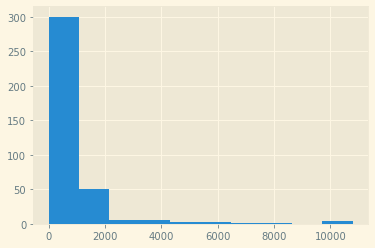

In [20]:
import matplotlib.pyplot as plt
plt.style.use("Solarize_Light2")
plt.hist([len(t) for t in texts])
plt.show()

In [21]:
# i_str1 = '(主旨：).+(繳款方式：)'
# c = 0

# for idx,_ in enumerate(text_c['受文者：']):
#     match1 = re.search(i_str1, text_c['受文者：'][idx])
#     try:
#         rg1 = match1.span()
#     except:
#         c += 1
#         pass
#     rg_t1 = text_c['受文者：'][idx][rg1[0]:rg1[1]-5]
#     text_c['受文者：'][idx] = rg_t1

## Ckip

In [22]:
from ckiptagger import data_utils, construct_dictionary, WS, POS, NER

In [24]:
# data_utils.download_data_gdown("./")

In [25]:
ws = WS("./data")
pos = POS("./data")
ner = NER("./data")

C:\Users\ken19980727\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\layers\legacy_rnn\rnn_cell_impl.py:903: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  warnings.warn("`tf.nn.rnn_cell.LSTMCell` is deprecated and will be "
C:\Users\ken19980727\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1727: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


In [26]:
## Optional
word_to_weight = {
    "土地公": 1,
    "土地婆": 1,
    "公有": 2,
    "": 1,
    "來亂的": "啦",
    "緯來體育台": 1,
}
dictionary = construct_dictionary(word_to_weight)
print(dictionary)

[(2, {'公有': 2.0}), (3, {'土地公': 1.0, '土地婆': 1.0}), (5, {'緯來體育台': 1.0})]


In [27]:
sentence_list = [
    "傅達仁今將執行安樂死，卻突然爆出自己20年前遭緯來體育台封殺，他不懂自己哪裡得罪到電視台。"
]

word_sentence_list = ws(
    sentence_list,
#     sentence_segmentation = True,
#     segment_delimiter_set = {",", "。", ":", "?", "!", ";"},
#     recommend_dictionary = dictionary,
    # coerce_dictionary = dictionary2,
)

pos_sentence_list = pos(word_sentence_list)

entity_sentence_list = ner(word_sentence_list, pos_sentence_list)

InternalError: 2 root error(s) found.
  (0) Internal: Blas GEMM launch failed : a.shape=(1, 804), b.shape=(804, 2000), m=1, n=2000, k=804
	 [[{{node lstm_cell_1/MatMul}}]]
	 [[model_asbc_Att-0_BiLSTM-cross-2-500_batch128-run1_2/output_layer/BiasAdd/_153]]
  (1) Internal: Blas GEMM launch failed : a.shape=(1, 804), b.shape=(804, 2000), m=1, n=2000, k=804
	 [[{{node lstm_cell_1/MatMul}}]]
0 successful operations.
0 derived errors ignored.

In [ ]:
word_sentence_list

In [ ]:
pos_sentence_list

In [ ]:
entity_sentence_list

## Ckip on our Dataset

In [ ]:
TEXT_ID = 0

In [ ]:
word_sentence_list = ws(
    [texts[TEXT_ID]],
    segment_delimiter_set = {",", "。", ":", "?", "!", ";"},
)

pos_sentence_list = pos(word_sentence_list)

entity_sentence_list = ner(word_sentence_list, pos_sentence_list)

In [ ]:
list(entity_sentence_list[0])

In [ ]:
for i in (entity_sentence_list[0]):
    print(i)
    break

## 檢查NER的Index與資料是否符合

In [ ]:
def Inspect_with_NER_index(text,ner_table):
    for ner in ner_table:
        if ner[3] != text[ner[0]:ner[1]]:
            print(ner[3] , text[ner[0]:ner[1]])

In [ ]:
NER_T = sorted(entity_sentence_list[0], key = lambda s: s[0]).copy()
Inspect_with_NER_index(texts[0],NER_T)

In [ ]:
NER_T

## Flask Web

In [ ]:
from flask import Flask

In [167]:
def NER_front_end(text,ner_table):
    ner_id = 0
    web_string = []
    cls = False
    web_string.append('<div>')
    for idx,t in enumerate(text):
        if ner_table[ner_id][0] == idx:
            cls = True
            web_string.append('<span style= "background-color:yellow;">')
            web_string.append(t)
            if ner_table[ner_id][1]-1 == ner_table[ner_id][0]:
                web_string.append(f'</span><sup style="color:red;">{ner_table[ner_id][2]}</sup>')
                cls = False
                if len(ner_table)-1 != ner_id:
                    ner_id += 1
                continue
        elif cls == True and ner_table[ner_id][1]-1 != idx:
            web_string.append(t)
        elif cls == True and ner_table[ner_id][1]-1 == idx:
            web_string.append(t)
            web_string.append(f'</span><sup style="color:red;">{ner_table[ner_id][2]}</sup>')
            cls = False
            if len(ner_table)-1 != ner_id:
                ner_id += 1
        else:
            web_string.append(t)
    web_string.append('</div>')
    print(''.join(web_string))
    return ''.join(web_string)

In [168]:
Web_NER_Content = NER_front_end(texts[0],NER_T)

<div>主旨：<span style= "background-color:yellow;">查貴公司</span><sup style="color:red;">ORG</sup>辦理<span style= "background-color:yellow;">新北市</span><sup style="color:red;">GPE</sup>新莊區副都心段一小段407地號不動產投資案，核有違反<span style= "background-color:yellow;">保險法</span><sup style="color:red;">LAW</sup>相關規定，依<span style= "background-color:yellow;">保險法</span><sup style="color:red;">LAW</sup>第168條<span style= "background-color:yellow;">第5</span><sup style="color:red;">ORDINAL</sup>項<span style= "background-color:yellow;">第3</span><sup style="color:red;">ORDINAL</sup>款及<span style= "background-color:yellow;">第172</span><sup style="color:red;">ORDINAL</sup>條之<span style= "background-color:yellow;">2第1</span><sup style="color:red;">ORDINAL</sup>項規定核處罰鍰<span style= "background-color:yellow;">新臺幣200萬元</span><sup style="color:red;">MONEY</sup>整，並依同法<span style= "background-color:yellow;">第149</span><sup style="color:red;">ORDINAL</sup>條<span style= "background-color:yellow;">第1</span><sup style="color:red;">ORD

In [165]:
app = Flask(__name__)

In [166]:
@app.route("/")
def home():
    return Web_NER_Content

app.run()

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [01/Aug/2021 00:43:46] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [01/Aug/2021 10:48:21] "GET / HTTP/1.1" 200 -
